In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

sns.set(style = 'darkgrid')

In [ ]:
df = pd.read_csv()
df.shape'/content/drive/MyDrive/Cardiovascular_Disease_Dataset.csv'

(1000, 14)

In [ ]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [ ]:
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [ ]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


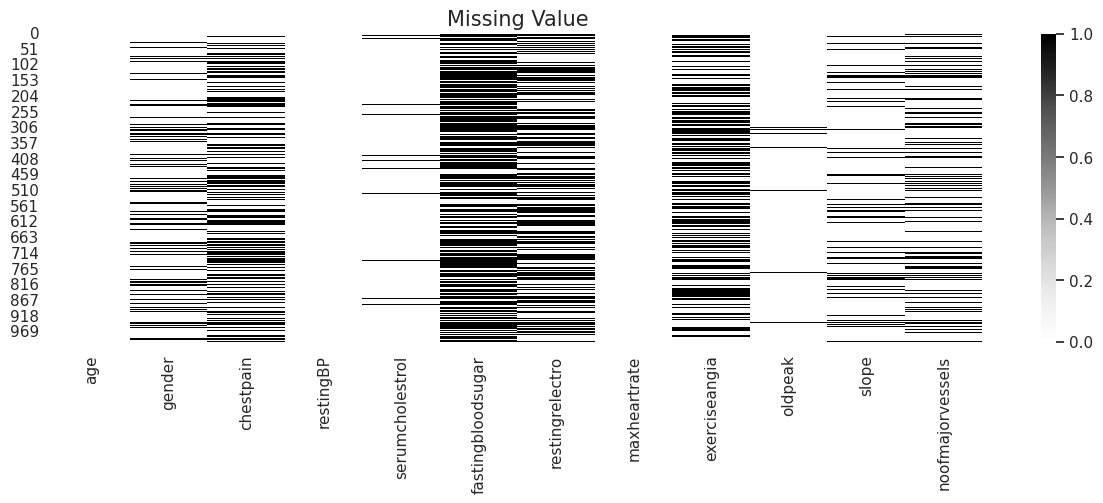

In [ ]:
plt.figure(figsize = (15,4))

df_null = df.iloc[:,1:-1].replace(0, np.nan)

sns.heatmap(df_null.isnull(), cmap = 'Greys')
plt.title('Missing Value', size = 15)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install -U scikit-learn 1.4.1

ERROR: Could not find a version that satisfies the requirement 1.4.1 (from versions: none)
ERROR: No matching distribution found for 1.4.1


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


1    580
0    420
Name: target, dtype: int64


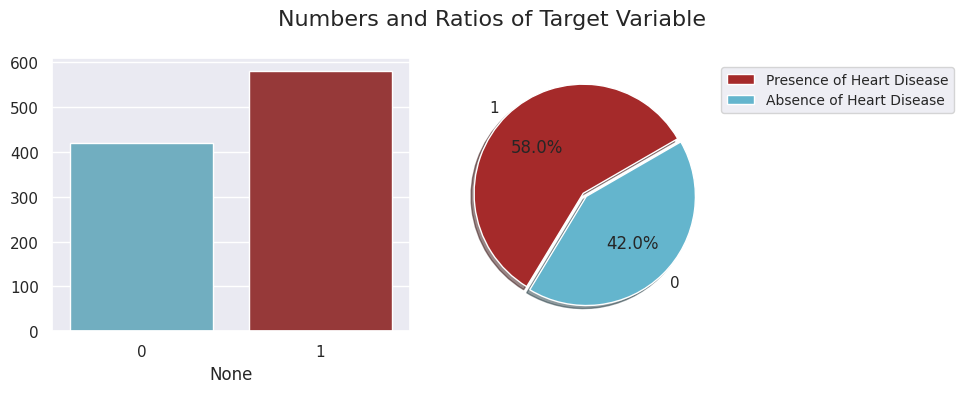

In [ ]:
plt.figure(figsize=(10,4))
cols = ["c", "brown"]
plt.subplot(1,2,1)
sns.barplot(x=df["target"].value_counts().index, y=df["target"].value_counts(), palette=cols)
plt.ylabel("")
plt.subplot(1,2,2)
plt.pie(x=df["target"].value_counts(), labels=df["target"].value_counts().index, shadow=True,
        explode=[0.02, 0.02], startangle=30, autopct='%0.1f%%', colors=["brown", "c"])
plt.legend(labels=["Presence of Heart Disease", "Absence of Heart Disease"], loc=(1,0.8), fontsize="small")
plt.suptitle("Numbers and Ratios of Target Variable", fontsize=16)
plt.tight_layout()
print(df.target.value_counts())
plt.show()

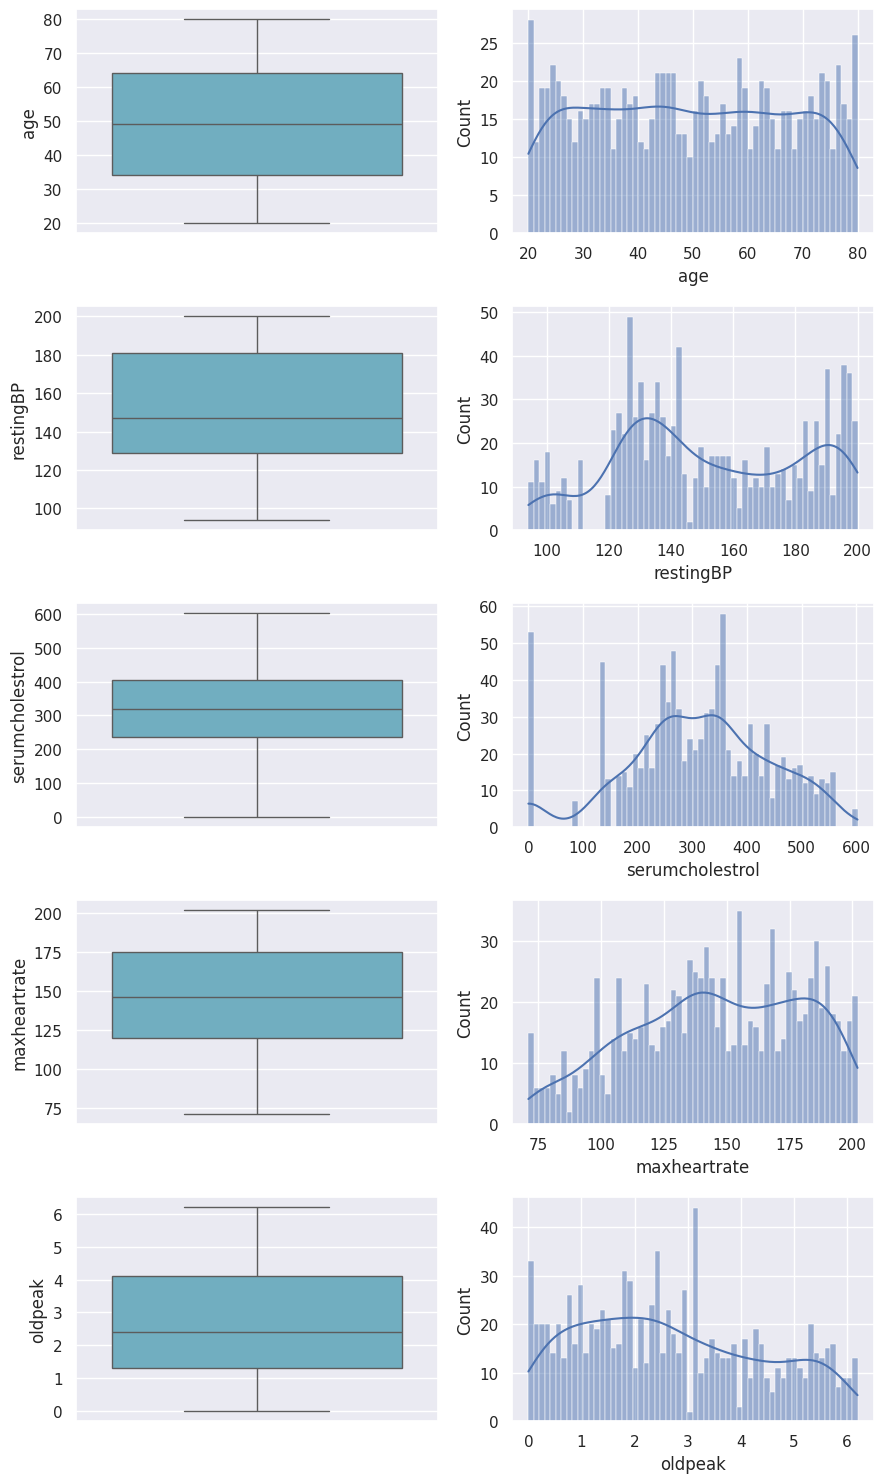

In [ ]:
num_list = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
plt.figure(figsize=(9,15))
j = 1
for i in num_list:
    plt.subplot(5,2, j)
    sns.boxplot(df[i], color="c")
    plt.subplot(5,2, j+1)
    sns.histplot(df[i], bins=60, kde=True)
    j = j +2
    #plt.suptitle("Distributions of numerical variables\n", fontsize=15)
plt.tight_layout()
plt.show()


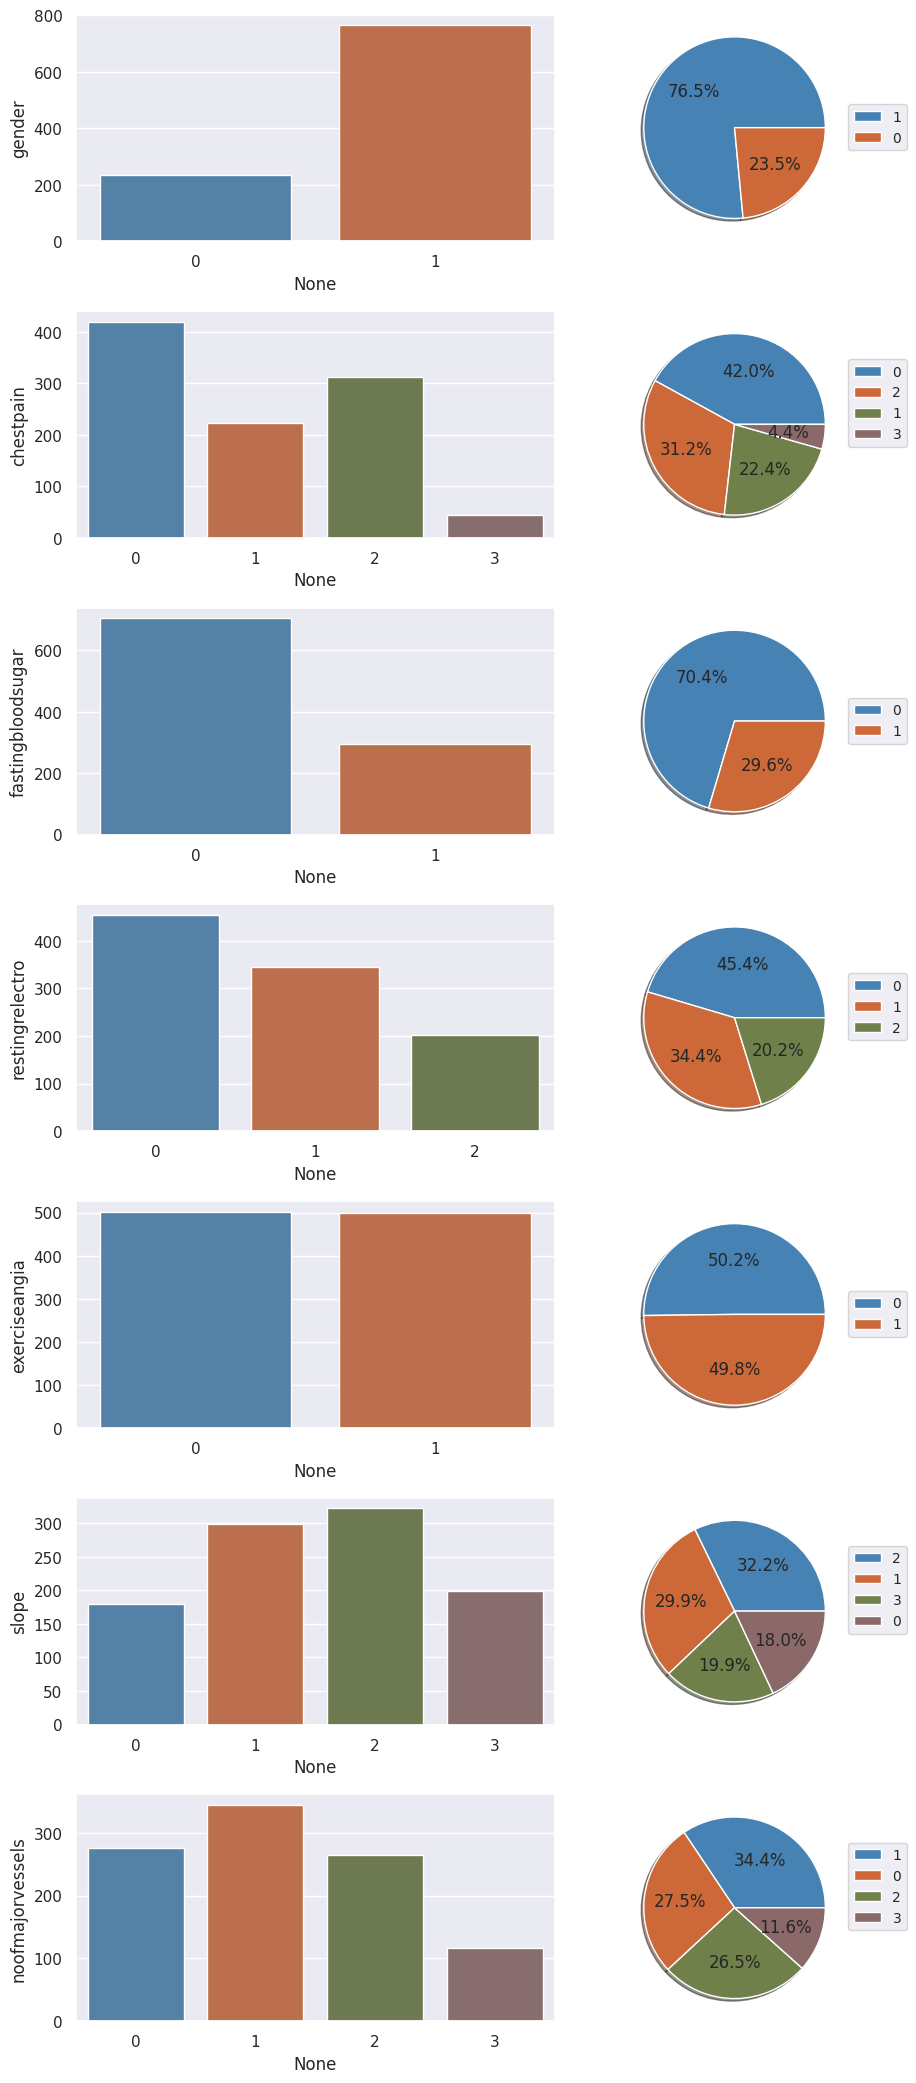

In [ ]:
cat_list = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']

plt.figure(figsize=(10,21))
j = 1
for i in cat_list:
    plt.subplot(7,2, j)
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=["#4682b4", "#cd6839", "#6f804a", "#8b6969"])
    plt.subplot(7,2, j+1)
    plt.pie(df[i].value_counts(), shadow=True, autopct='%0.1f%%', colors=["#4682b4", "#cd6839", "#6f804a", "#8b6969"])
    j = j +2
    plt.legend(labels=df[i].value_counts().index, loc=(1,0.4), fontsize="small")
plt.tight_layout()
plt.show()


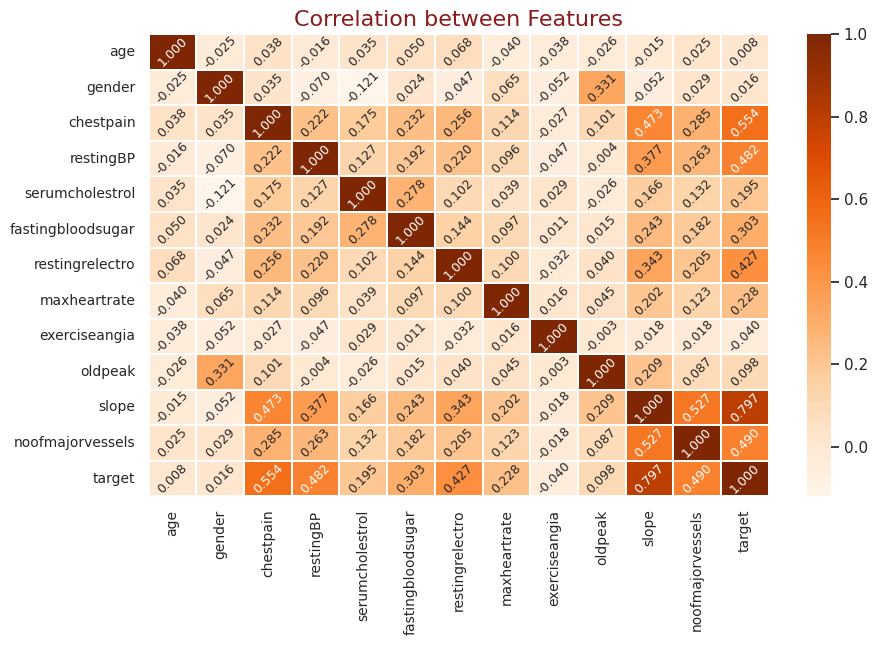

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop("patientid",axis=1).corr(), linewidths=0.05, annot=True,
            annot_kws={'size': 9, 'rotation': 45}, fmt='.3f', cmap="Oranges")
plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.title("Correlation between Features", fontsize=16, color="#8b1a1a")
plt.show()

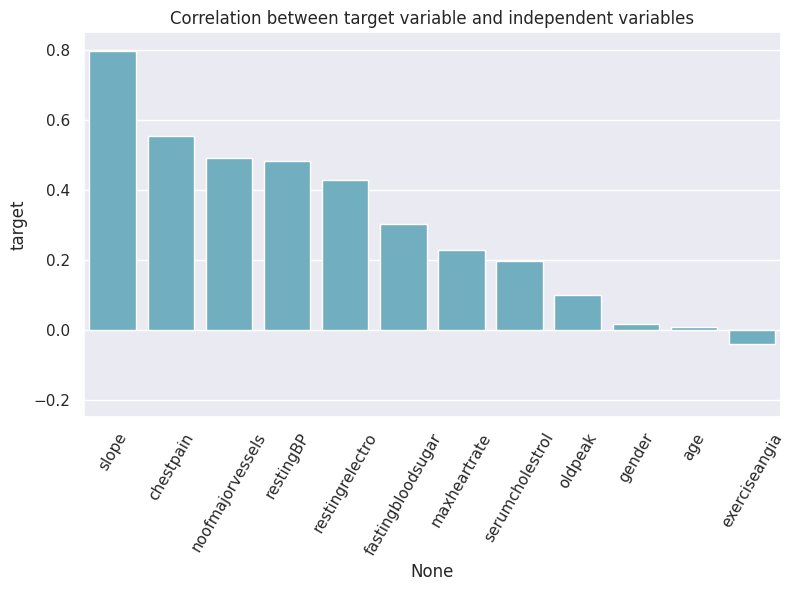

In [ ]:
corr_features = df.drop("patientid",axis=1).corr()["target"].sort_values(ascending=False)[1:]

plt.figure(figsize=(9,5))
sns.barplot(x=corr_features.index, y=corr_features, color="c")
plt.ylim(-0.25, 0.85), plt.xticks(rotation=60)
plt.title("Correlation between target variable and independent variables")
plt.show()

In [ ]:
# There are features with large variance values
df.iloc[:,1:].var()

age                    319.148585
gender                   0.179955
chestpain                0.908509
restingBP              897.914906
serumcholestrol      17541.360552
fastingbloodsugar        0.208593
restingrelectro          0.593089
maxheartrate          1168.974445
exerciseangia            0.250246
oldpeak                  2.960992
slope                    1.007407
noofmajorvessels         0.955672
target                   0.243844
dtype: float64

In [ ]:
df = pd.get_dummies(data=df, columns=["gender", "chestpain", "fastingbloodsugar", "restingrelectro",
                                      "exerciseangia", "noofmajorvessels"], drop_first=True)

In [ ]:
scaler = StandardScaler()
df.iloc[:,1:7] = scaler.fit_transform(df.iloc[:,1:7])

In [ ]:
y = df["target"]
X = df.drop(["patientid", "target"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model_list=[RandomForestClassifier(),LogisticRegression(),SVC(),MLPClassifier(),
            AdaBoostClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),
            HistGradientBoostingClassifier(),XGBClassifier(), XGBRFClassifier()]

for i in model_list:
    model = i.fit(X_train, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} accuracy: {accuracy:.3f}\n")

RandomForestClassifier accuracy: 0.987

LogisticRegression accuracy: 0.970

SVC accuracy: 0.980

MLPClassifier accuracy: 0.973

AdaBoostClassifier accuracy: 0.980

ExtraTreesClassifier accuracy: 0.990

GradientBoostingClassifier accuracy: 0.983

HistGradientBoostingClassifier accuracy: 0.987

XGBClassifier accuracy: 0.970

XGBRFClassifier accuracy: 0.967



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Cardiovascular_Disease_Dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Cardiovascular_Disease_Dataset.csv')

In [ ]:
df.head(2)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0


In [ ]:
df.shape

(1000, 14)

In [ ]:
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [ ]:
df = df[df['serumcholestrol'] >= 126]

In [ ]:
df['patientid'].count()

940

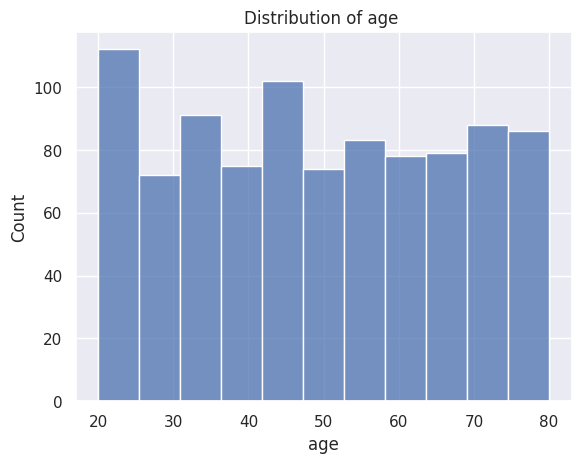

In [ ]:
sns.histplot(df['age'])
plt.title('Distribution of age ')
plt.show()

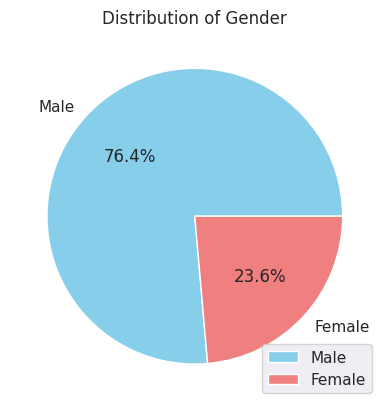

In [ ]:
g = df['gender'].value_counts()
gender_labels = {1: 'Male', 0: 'Female'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of Gender')
plt.show()

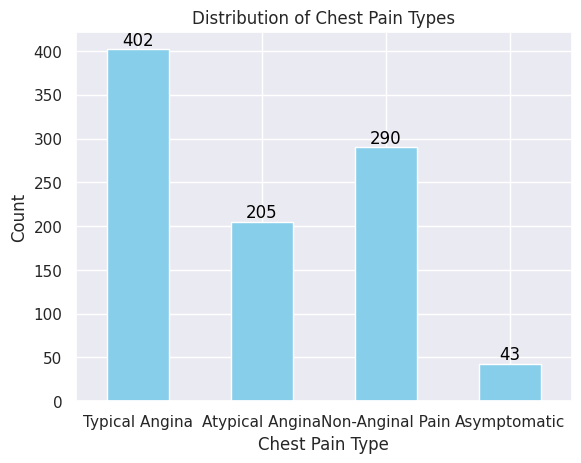

In [ ]:
chestpain_labels = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'}
bf = df['chestpain'].value_counts().sort_index().plot(kind='bar', color='skyblue')

for p in bf.patches:
    bf.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

bf.set_xticklabels([chestpain_labels[i] for i in bf.get_xticks()], rotation=0)

plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

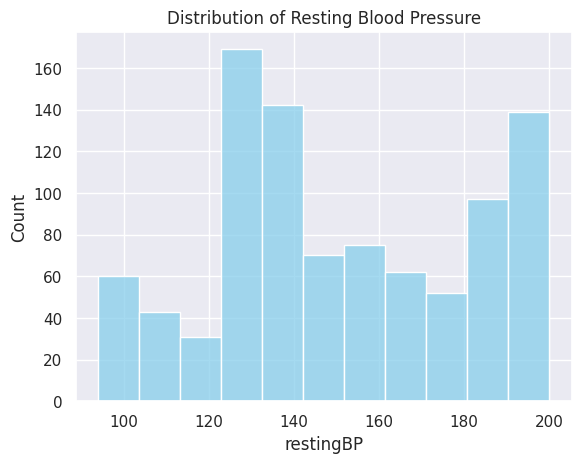

In [ ]:

sns.histplot(df['restingBP'], color='skyblue')
plt.title('Distribution of Resting Blood Pressure')
plt.show()


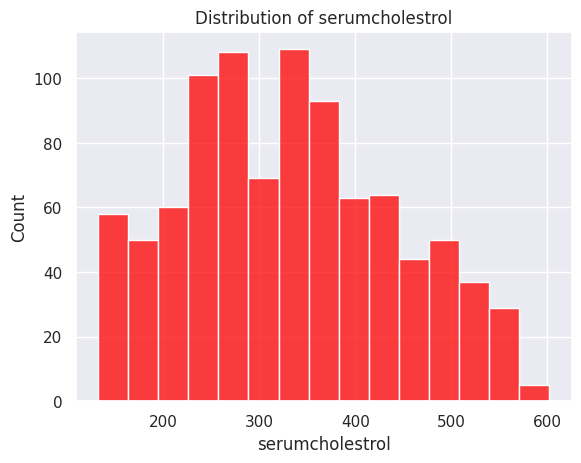

In [ ]:
df['serumcholestrol'].min(),df['serumcholestrol'].mean()
sns.histplot(df['serumcholestrol'], color='red')
plt.title('Distribution of serumcholestrol')
plt.show()

In [ ]:
df['serumcholestrol'].min(),df['serumcholestrol'].mean()

(132, 330.68510638297874)

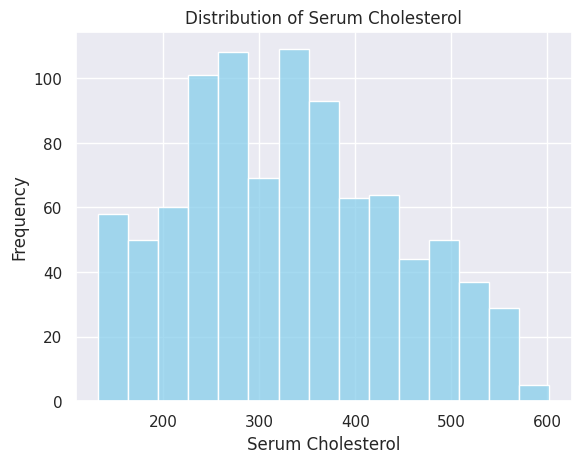

In [ ]:
sns.histplot(df['serumcholestrol'], color='skyblue')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')
plt.show()

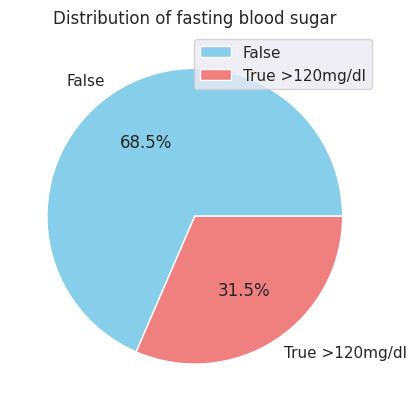

In [ ]:
g = df['fastingbloodsugar'].value_counts()
gender_labels = {1: 'True >120mg/dl', 0: 'False'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of fasting blood sugar')
plt.show()


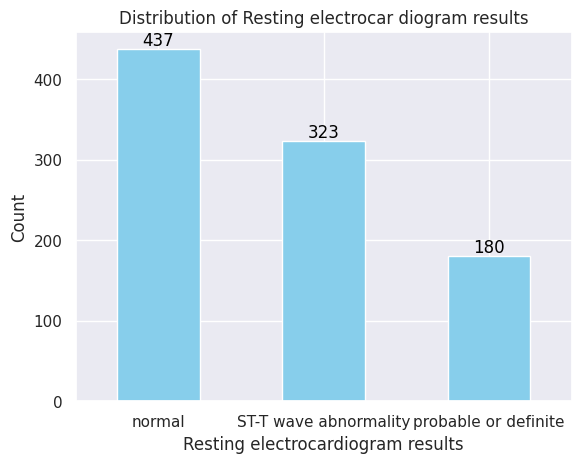

In [ ]:
chestpain_labels = {0: 'normal', 1: 'ST-T wave abnormality', 2: 'probable or definite'}
re= df['restingrelectro'].value_counts().sort_index().plot(kind='bar', color='skyblue')

for p in re.patches:
    re.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

re.set_xticklabels([chestpain_labels[i] for i in re.get_xticks()], rotation=0)

plt.title('Distribution of Resting electrocar diogram results')
plt.xlabel('Resting electrocardiogram results')
plt.ylabel('Count')
plt.show()

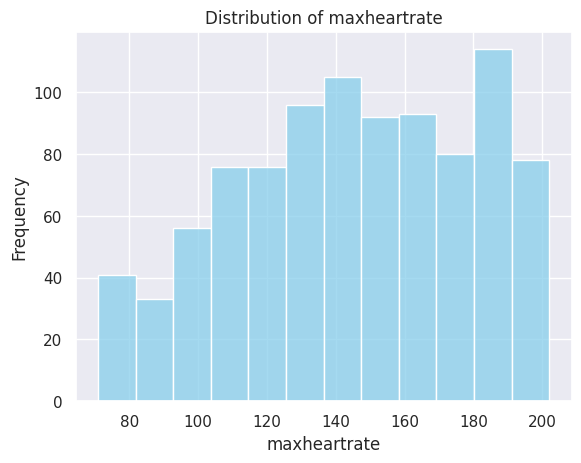

In [ ]:
sns.histplot(df['maxheartrate'], color='skyblue')
plt.title('Distribution of maxheartrate')
plt.xlabel('maxheartrate')
plt.ylabel('Frequency')
plt.show()


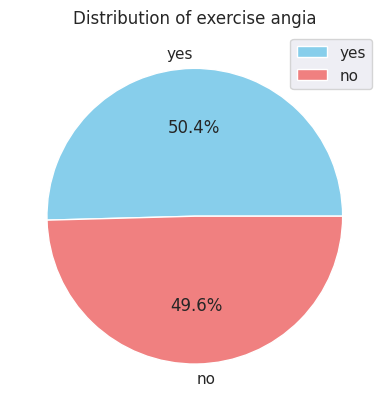

In [ ]:
e = df['exerciseangia'].value_counts()
gender_labels = {1: 'yes', 0: 'no'}
e.index = e.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(e, labels=e.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of exercise angia')
plt.show()

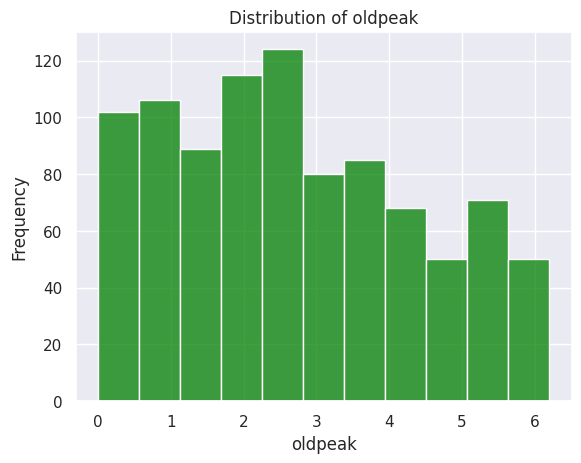

In [ ]:
sns.histplot(df['oldpeak'], color='green')
plt.title('Distribution of oldpeak')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()

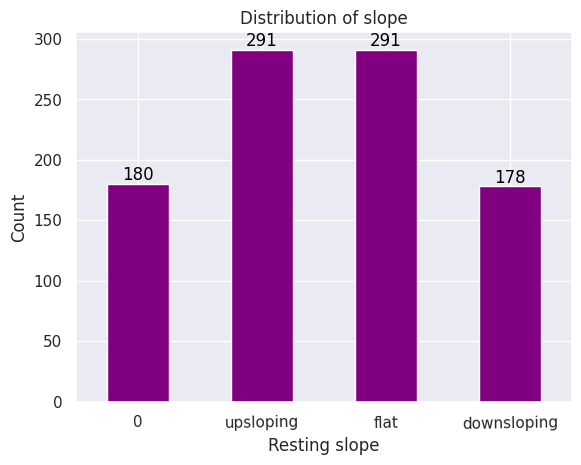

In [ ]:
chestpain_labels = {0:'0',1: 'upsloping', 2: 'flat',3:'downsloping'}
re= df['slope'].value_counts().sort_index().plot(kind='bar', color='purple')

for p in re.patches:
    re.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

re.set_xticklabels([chestpain_labels[i] for i in re.get_xticks()], rotation=1)

plt.title('Distribution of slope')
plt.xlabel('Resting slope')
plt.ylabel('Count')
plt.show()


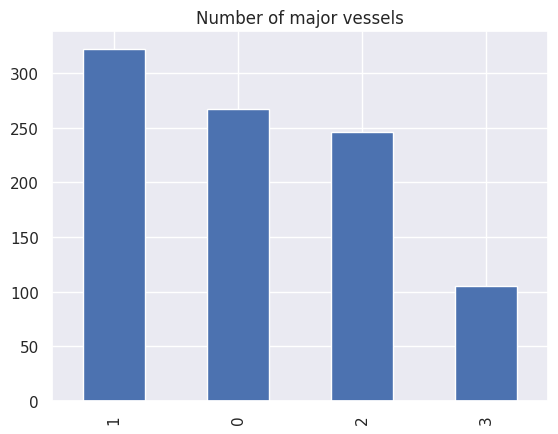

In [ ]:
df['noofmajorvessels'].value_counts().plot(kind='bar')
plt.title('Number of major vessels')
plt.show()

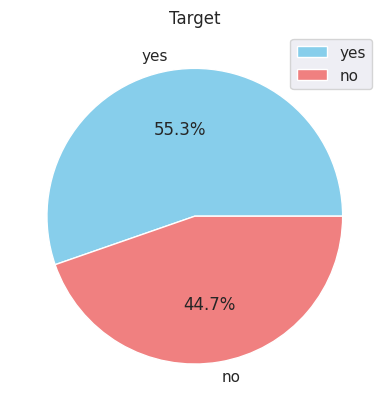

In [ ]:
t = df['target'].value_counts()
gender_labels = {1: 'Presence', 0: 'Absence'}
t.index = t.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(t, labels=e.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Target')
plt.show()

In [ ]:
df.head(3)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1


In [ ]:
df.drop(columns='patientid',inplace=True)

In [ ]:
patient_Presence=df[df['target']==1]

In [ ]:
patient_Presence_male=patient_Presence[patient_Presence['gender']==1]

In [ ]:
patient_Presence_male.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000,400.000000,400.000000,400.000000,400.0
mean,49.495000,1.0,1.512500,163.902500,366.012500,0.472500,1.017500,154.81250,0.475,3.098500,2.215000,1.730000,1.0
std,17.206106,0.0,0.810238,24.030223,113.727976,0.499868,0.792947,25.84419,0.500,1.783943,0.659441,0.786541,0.0
min,20.000000,1.0,0.000000,94.000000,170.000000,0.000000,0.000000,105.00000,0.000,0.000000,1.000000,0.000000,1.0
25%,35.000000,1.0,1.000000,147.000000,271.750000,0.000000,0.000000,137.00000,0.000,1.575000,2.000000,1.000000,1.0
50%,49.000000,1.0,2.000000,166.000000,367.000000,0.000000,1.000000,154.50000,0.000,3.100000,2.000000,2.000000,1.0
75%,63.250000,1.0,2.000000,184.000000,464.000000,1.000000,2.000000,176.00000,1.000,4.600000,3.000000,2.000000,1.0
max,80.000000,1.0,3.000000,200.000000,602.000000,1.000000,2.000000,202.00000,1.000,6.200000,3.000000,3.000000,1.0


In [ ]:
patient_Presence_female =patient_Presence[patient_Presence['gender']==0]
patient_Presence_female.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0
mean,49.750000,0.0,1.316667,165.366667,386.616667,0.425000,1.033333,142.175000,0.541667,2.032500,2.241667,1.333333,1.0
std,17.467016,0.0,1.004053,32.480099,108.372311,0.496416,0.829431,34.028081,0.500350,0.884808,0.594030,1.023533,0.0
min,20.000000,0.0,0.000000,94.000000,177.000000,0.000000,0.000000,96.000000,0.000000,0.000000,1.000000,0.000000,1.0
25%,36.750000,0.0,0.000000,133.000000,297.750000,0.000000,0.000000,109.500000,0.000000,1.400000,2.000000,0.000000,1.0
50%,49.000000,0.0,1.000000,184.000000,385.500000,0.000000,1.000000,140.500000,1.000000,1.900000,2.000000,1.000000,1.0
75%,64.250000,0.0,2.000000,191.000000,488.250000,1.000000,2.000000,175.000000,1.000000,2.750000,3.000000,2.000000,1.0
max,80.000000,0.0,3.000000,200.000000,561.000000,1.000000,2.000000,198.000000,1.000000,3.200000,3.000000,3.000000,1.0


In [ ]:
patient_Absence=df[df['target']==0]

In [ ]:
patient_Absence_male=patient_Absence[patient_Absence['gender']==1]

In [ ]:
patient_Absence_male.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,318.000000,318.0,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.0
mean,48.776730,1.0,0.342767,131.842767,265.905660,0.132075,0.314465,135.584906,0.522013,2.909119,0.528302,0.569182,0.0
std,18.822862,0.0,0.663701,26.501481,73.779345,0.339106,0.484958,39.975750,0.500302,1.737927,0.548141,0.782252,0.0
min,20.000000,1.0,0.000000,94.000000,132.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,32.000000,1.0,0.000000,113.250000,231.250000,0.000000,0.000000,101.000000,0.000000,1.325000,0.000000,0.000000,0.0
50%,48.500000,1.0,0.000000,127.000000,268.000000,0.000000,0.000000,132.000000,1.000000,2.900000,1.000000,0.000000,0.0
75%,66.000000,1.0,0.000000,140.000000,336.000000,0.000000,1.000000,172.000000,1.000000,4.300000,1.000000,1.000000,0.0
max,80.000000,1.0,3.000000,200.000000,357.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,0.0


In [ ]:
patient_Absence_female =patient_Absence[patient_Absence['gender']==0]
patient_Absence_female.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,102.000000,102.0,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,49.970588,0.0,0.411765,143.892157,328.303922,0.137255,0.509804,138.558824,0.519608,1.263725,0.823529,0.941176,0.0
std,18.393098,0.0,0.722385,24.724585,108.369718,0.345816,0.592780,37.034791,0.502083,0.833552,0.475369,0.899103,0.0
min,20.000000,0.0,0.000000,94.000000,164.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,33.500000,0.0,0.000000,130.000000,221.250000,0.000000,0.000000,111.500000,0.000000,0.400000,1.000000,0.000000,0.0
50%,50.500000,0.0,0.000000,138.500000,361.000000,0.000000,0.000000,135.500000,1.000000,1.400000,1.000000,1.000000,0.0
75%,67.000000,0.0,1.000000,153.750000,431.000000,0.000000,1.000000,169.500000,1.000000,1.900000,1.000000,2.000000,0.0
max,80.000000,0.0,3.000000,200.000000,465.000000,1.000000,2.000000,202.000000,1.000000,2.600000,2.000000,3.000000,0.0


In [ ]:
age_tregt=df.query('age >60 and target == 1')

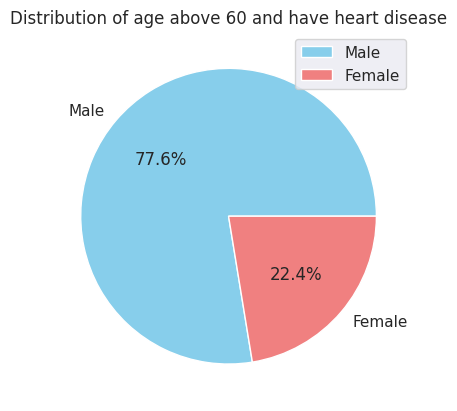

In [ ]:
g = age_tregt['gender'].value_counts()
gender_labels = {1: 'Male', 0: 'Female'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of age above 60 and have heart disease')
plt.show()

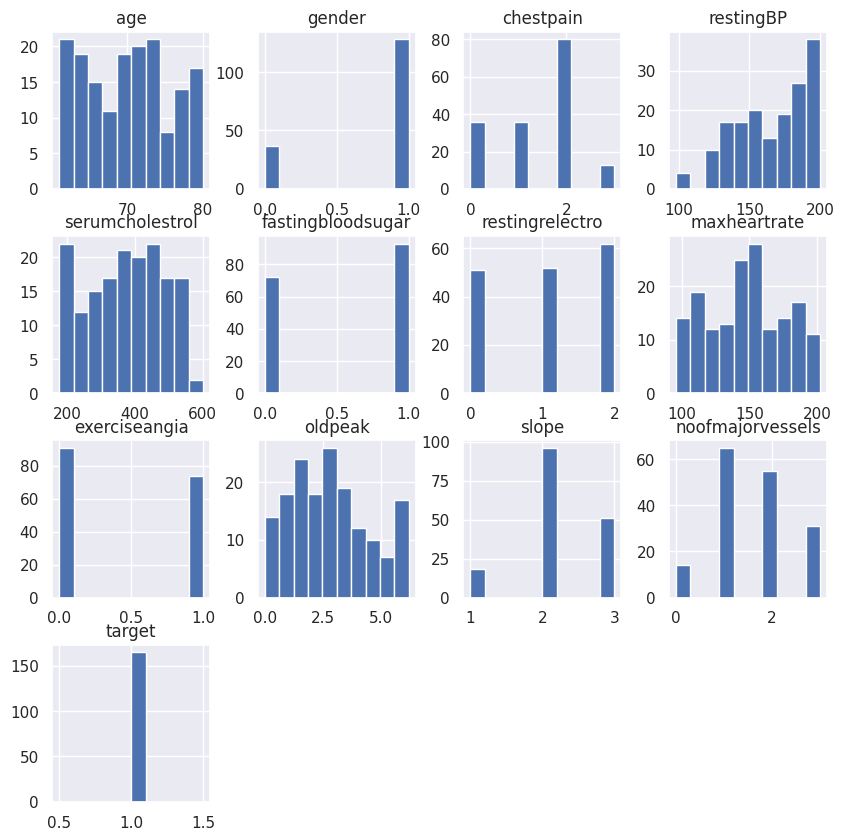

In [ ]:
age_tregt.hist(figsize=(10,10))
plt.title('distribution of age above 60 and have heart disease')
plt.show()

In [ ]:
df.head(1)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0


In [ ]:
X=df.drop(columns='target')
y=df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lg=LogisticRegression(solver='liblinear')

In [ ]:
y_pred = lg.predict(X_test)
l.fit(X_train, y_train)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.